# World University Ranking

Investigate the best universities in the world

In [1]:
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns
import os
import re
import geopandas as gpd

Import libraries

Seaborn provides a high-level interface for drawing attractive statistical graphics.

Geopandas can make working with geospatial data in python easier. 

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

Some magic that tells jupyter to put graphs and things in the notebook 

instead of the default behaviour which is to save it as a file.

In [3]:
# give us a style state to go back to
saved_style_state = matplotlib.rcParams.copy()

In [113]:
if os.path.isfile("timesData.csv"):
    filepath = "timesData.csv"
    print "loading from file"
else:
    filepath = "https://www.kaggle.com/mylesoneill/world-university-rankings/downloads/timesData.csv"
    print "loading from the Internet"
wur_data = pd.read_csv(filepath)
print "done"

loading from file
done


Have a general overview what the dataste looks like.

In [39]:
wur_data.head();

Get the concise summary of the whole dataframe: (semicolon cannot suppress dataframe.info output)

Index

Columns

Data type

Meory usage

...

In [44]:
wur_data.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 2002
Data columns (total 14 columns):
world_rank                1201 non-null int64
university_name           1201 non-null object
country                   1201 non-null object
teaching                  1201 non-null float64
international             1192 non-null float64
research                  1201 non-null float64
citations                 1201 non-null float64
income                    1061 non-null float64
total_score               1201 non-null float64
num_students              1182 non-null float64
student_staff_ratio       1182 non-null float64
international_students    1181 non-null float64
female_male_ratio         1078 non-null object
year                      1201 non-null int64
dtypes: float64(9), int64(2), object(3)
memory usage: 140.7+ KB


Only focus on one row.

In [43]:
wur_data.iloc[1];

After an overview, two modifications need to be done:

Delete or drop rows, columns, values... (which are not deriable or applicable for data visualisation and analysis)

Change data type (Some number values are string, which is a disaster when using pandas to deal with a dataset) 

Zip dtype with row_1 (and then change the data type of numbers from string to int or float).

In [53]:
dtype = zip([type(x) for x in wur_data.ix[1]], wur_data.ix[1], wur_data.ix[1].keys())
dtype;

## world_rank

Use dataframe.value_counts() to find some undesirable vaules in the column or some weird symbols within a value.

In [112]:
wur_data['world_rank'].value_counts();

Minus sign in the middle over 200

Equals sing in the front for the smme world rank under 200

Drop rows based on column value which contains minus sign '-'.

Therefore only keep 200 universities every year for the following data visualisaiton and analysis.

In [114]:
wur_data = wur_data[wur_data['world_rank'].str.contains('-') == False]

In [115]:
def replace(df, column):
    if df[column].str.contains('=').any():
        df[column] = df[column].apply(lambda x: re.sub('=', '', x))

Replace equals sign '=' with nothing ''.

In [116]:
replace(wur_data, 'world_rank')

Change data type from string to integer

In [117]:
wur_data['world_rank'].isnull().any()

False

In [118]:
wur_data['world_rank'] = wur_data['world_rank'].apply(int)

## international

In [119]:
wur_data['international'].value_counts();

Ignore values of '-' and change data type of other values to float.

In [120]:
wur_data['international'].isnull().any()

False

In [121]:
boo_international = wur_data['international'].str.contains('-') == False
wur_data['international'] = wur_data['international'][boo_international].apply(float)

## income

In [84]:
wur_data['income'].value_counts();

The same with 'international'.

In [122]:
wur_data['income'].isnull().any()

False

In [123]:
boo_income = wur_data['income'] != '-'
wur_data['income'] = wur_data['income'][boo_income].apply(float)

## total_score

In [124]:
wur_data['total_score'].value_counts();

No strange symbols.

In [125]:
wur_data['total_score'].isnull().any()

False

In [126]:
wur_data['total_score'] = wur_data['total_score'].apply(float);

## num_students

In [127]:
wur_data['num_students'].value_counts();

Replace comma ',' with nothing ''.

In [128]:
wur_data['num_students'].isnull().any()

True

In [129]:
boo_num_students = wur_data['num_students'].isnull() == False
wur_data['num_students'] = wur_data['num_students'][boo_num_students].apply(lambda x: re.sub(',', '', x)).apply(float)

## international_students

In [130]:
wur_data['international_students'].value_counts();

Convert percentage string to float.

In [134]:
wur_data['international_students'].isnull().any()

True

Srip of the percentage sign '%' at the end of the values.

In [135]:
wur_data['international_students'] = wur_data['international_students'].str.strip('%').apply(float)

Divided by 100.

In [136]:
wur_data['international_students'] = [x/100 for x in wur_data['international_students']]

## female_male_ratio

In [137]:
wur_data['female_male_ratio'].value_counts();

Ignore the colon ':' and do the divison using the numbers before and after the colon.

In [138]:
wur_data['female_male_ratio'].isnull().any()

True

In [139]:
boo_ratio = wur_data['female_male_ratio'].isnull() == False
x = wur_data['female_male_ratio'][boo_ratio].str[:2].apply(float)
y = wur_data['female_male_ratio'][boo_ratio].str[4:].apply(float)
wur_data['female_male_ratio'][boo_ratio] = [m/n for m, n in zip(x, y)];

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [140]:
wur_data.head();

Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [108]:
wur_data.describe()

,world_rank,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,year
count,1201.000000,1201.000000,1192.000000,1201.000000,1201.000000,1061.000000,1201.000000,1182.000000,1182.000000,1181.000000,1201.000000
mean,100.233972,50.730808,59.478523,52.252040,76.928726,54.230914,59.846128,23891.501692,15.932318,0.196274,2013.501249
std,57.634735,16.912699,21.209330,19.661541,15.535493,22.722593,12.803446,13635.554030,9.437269,0.101746,1.708374
min,1.000000,15.900000,14.800000,13.100000,8.600000,24.200000,41.400000,462.000000,3.600000,0.010000,2011.000000
25%,50.000000,38.300000,42.175000,37.100000,66.700000,36.300000,50.300000,14221.000000,10.200000,0.120000,2012.000000
50%,100.000000,47.500000,59.500000,48.500000,78.800000,45.800000,56.000000,22616.000000,14.700000,0.180000,2014.000000
75%,150.000000,60.200000,77.700000,64.700000,89.200000,68.200000,66.200000,31326.000000,18.700000,0.260000,2015.000000
max,200.000000,99.700000,100.000000,99.400000,100.000000,100.000000,96.100000,127431.000000,85.800000,0.540000,2016.000000


Mean value is only slightly more than the half of the maxmimum (world_rank, teaching, international, research, income, total_score);

Maxmimum value is very close or equal to the full score;

Standard deviation is quite huge, except for international_students, year;

## Average Number of Universities within Top 200 in a Country

Get the pandas Series with index = country, value = number of universities.

In [ ]:
num_years = abs(wur_data['year'].iloc[0] - wur_data['year'].iloc[-1])
country_uni = wur_data['country'].value_counts()/num_years;

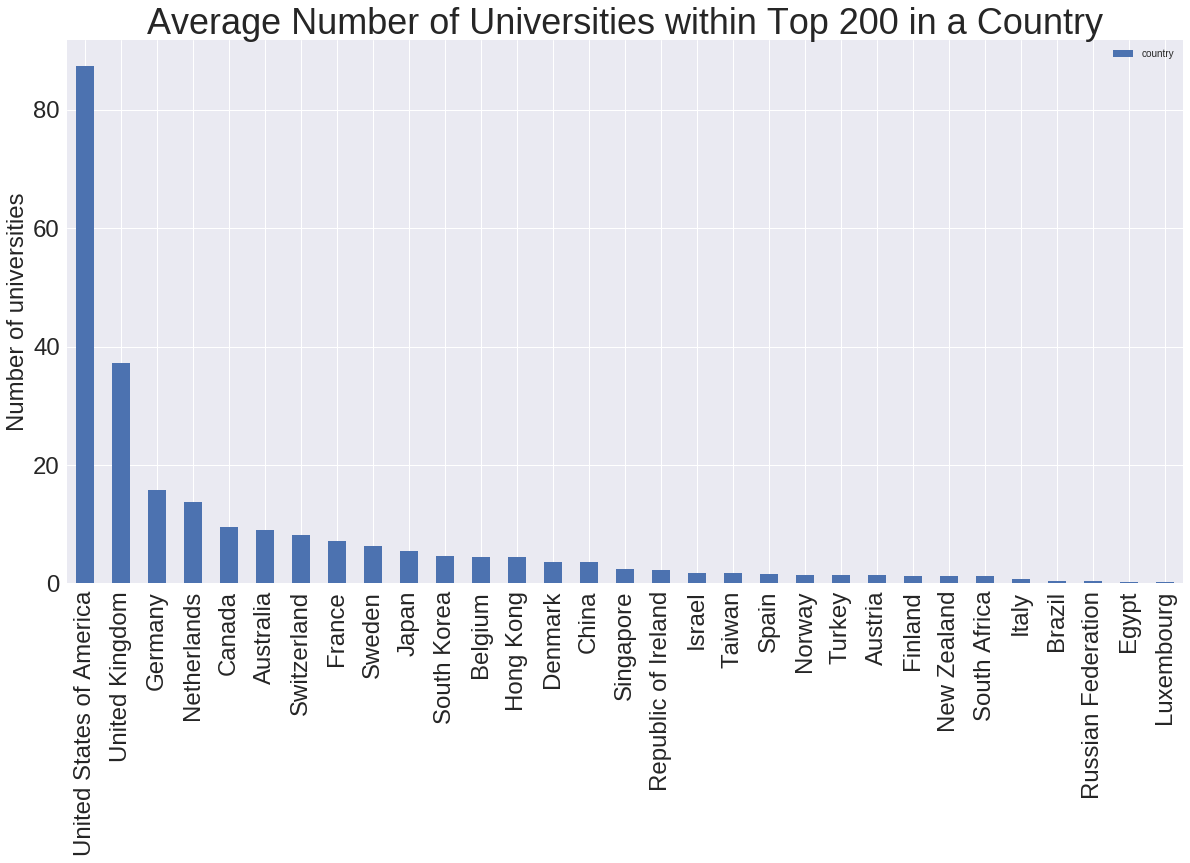

In [142]:
ax = country_uni.sort_values(ascending = False).plot(kind = 'bar', fontsize = 24, legend=True)
ax.set_title('Average Number of Universities within Top 200 in a Country', size=36)
ax.set_ylabel('Number of universities', size=24)

World rank top 200 universities across 6 years from 2011 to 2016.

Average unmber of universities in 6 years of every country:

Obviously, USA is predominatant, more than 80;

Folllowed by UK, less than 40, a sudden drop by more than a half;

The sum of the rest countries is less than that of USA and UK.

Then use geopandas to display a geospatial distribution of top 200 universities

Since my dataset has no corresponding cities but only countries,

the demonstartion is only in country level.

## geopandas

First, load a dataset containing natrual earth geometries from geopandas

In [143]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head();

There are several mismatches between the country names of two datasets.

1. rename indcies;

2. modify values;

3. delete rows.

The mismatch searching is done mannually, since I didn't find an approciate function to finish automatically.

In [144]:
country_uni = country_uni.rename(index = {'United States of America': 'United States', 'South Korea': 'Korea', 'Republic of Ireland': 'Ireland', 'Russian Federation': 'Russia', })
country_uni['China'] = country_uni['China'] + country_uni['Hong Kong']
del country_uni['Hong Kong'];

Reindex dataframe countr_uni by world['name'];

Fill missing values as 0.

In [145]:
country_uni = country_uni.reindex(world['name'], fill_value = 0);

Add one column called 'uni_per_country' into world;

Pass values of dataframe country_uni to 'uni_per_country'.

Then every country in world has both geometries and university numbers.

In [146]:
world['uni_per_country'] = country_uni.values

Get value range of column 'uni_per_country';

plot the choropleth map with a colorbar on the right.

In [147]:
vmin = world['uni_per_country'].min()
vmax = world['uni_per_country'].max()

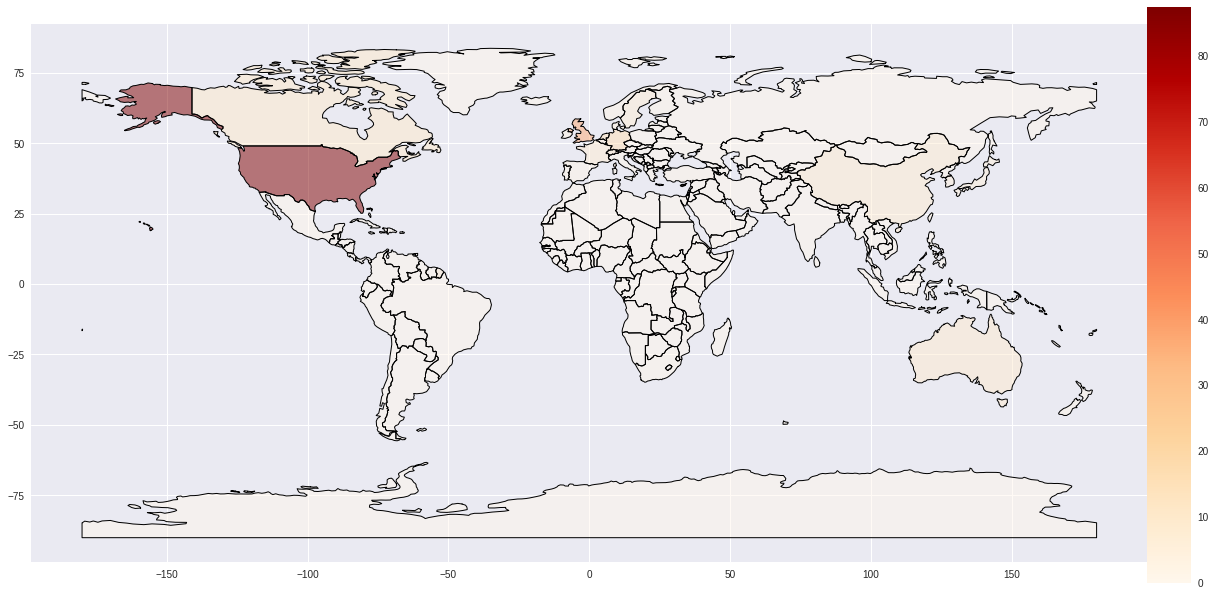

In [148]:
import shapely
ax = world.plot(column = 'uni_per_country', cmap="OrRd")
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax);

Overall, USA has a very DARK color.

while in contrast, the colors of all other countries are almost the same and faded away.

Mostly, we only care about the first, while the second is nothing but the same as the rest that we barely know.

## University with average world rank top 10

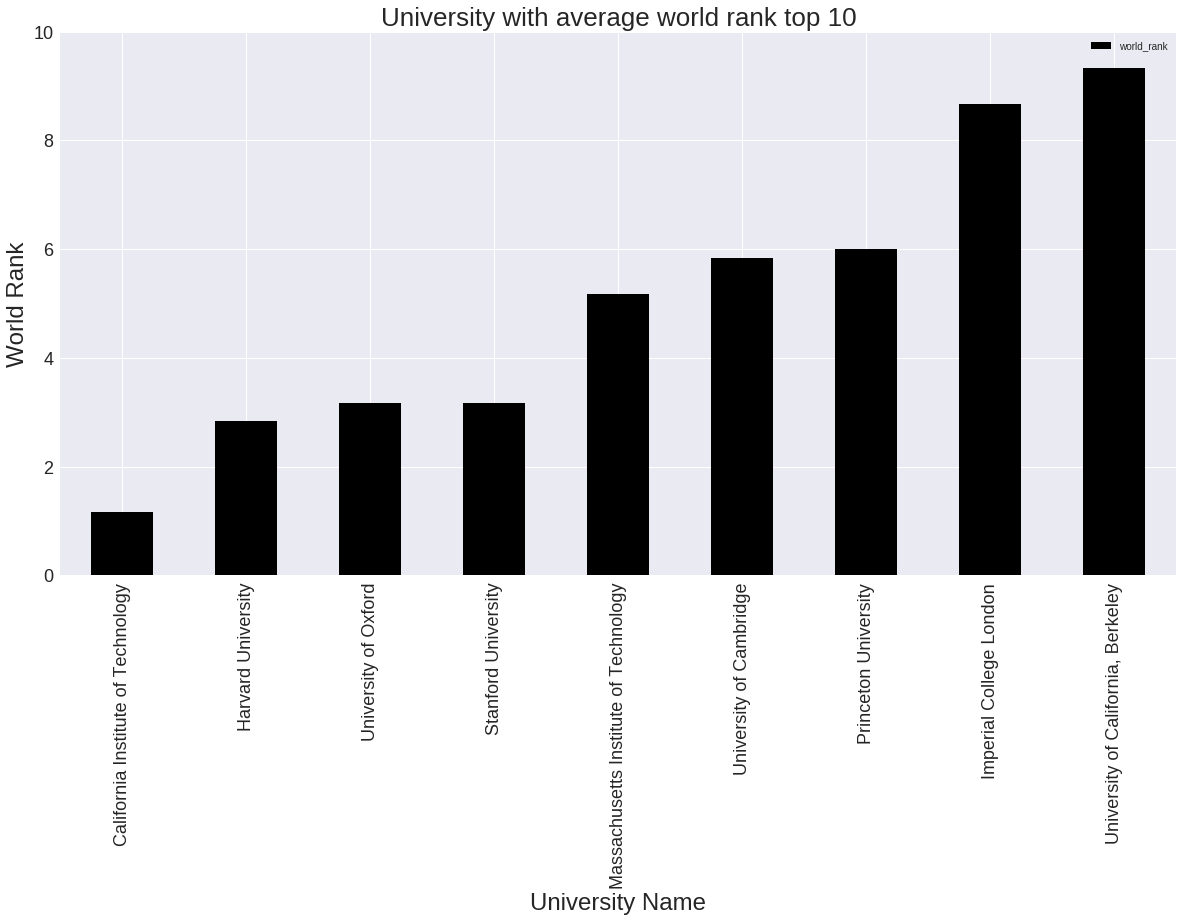

In [150]:
uni_rank = wur_data.pivot_table(index = 'university_name', values = 'world_rank', aggfunc = np.mean)
ax = uni_rank.sort_values(ascending = True)[uni_rank < 10.1].plot(kind='bar', fontsize= 18, legend=True, color='black')
ax.set_xlabel('University Name', size=24)
ax.set_ylabel('World Rank', size=24)
ax.set_title('University with average world rank top 10', size=26)
ax.set_ylim(0, 10)
ax.grid(True)

3 UK; 6 USA.

## Histgram

Define a function to draw one histgram with bins=100, norminalised.

In [153]:
def hist(df, column):
    plt.hist(df[column].dropna(), bins=100, normed=1, facecolor='blue')
    if '_' in column:
        column = column.replace('_', ' ')
    plt.xlabel(column.title(), fontsize = 24)
    plt.ylabel('Probability', fontsize = 24)
    plt.title('{} Distribution'.format(column).title(), fontsize = 36)
    plt.grid(True)
    plt.show()

Use a for loop and function hist to draw histgrams for every column which has number in the data.

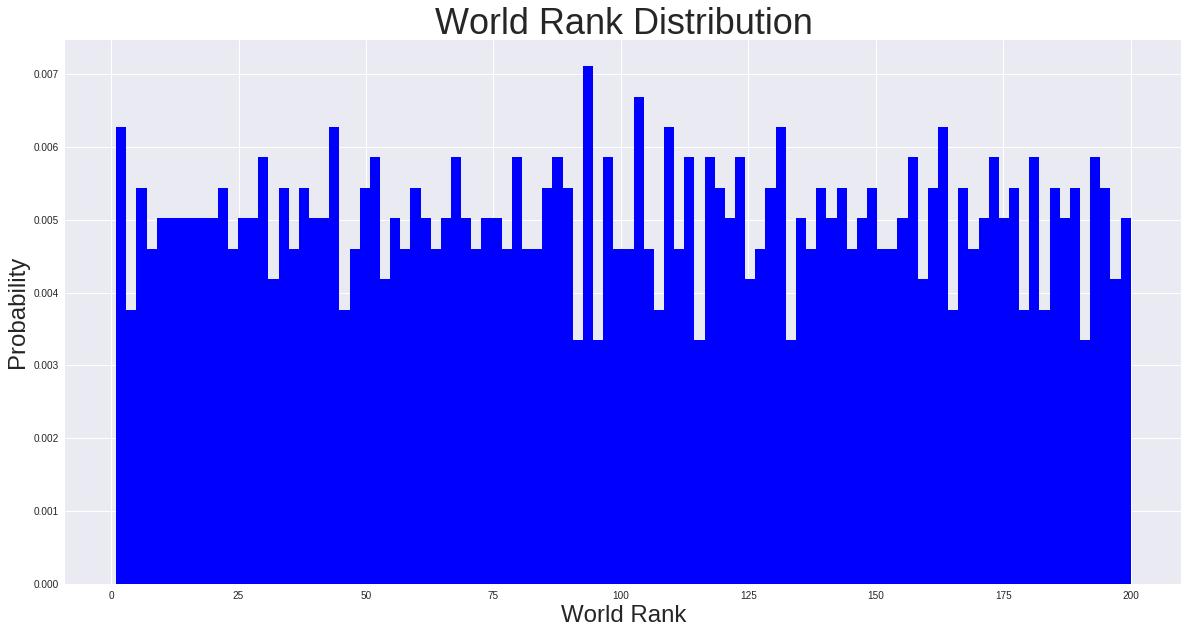

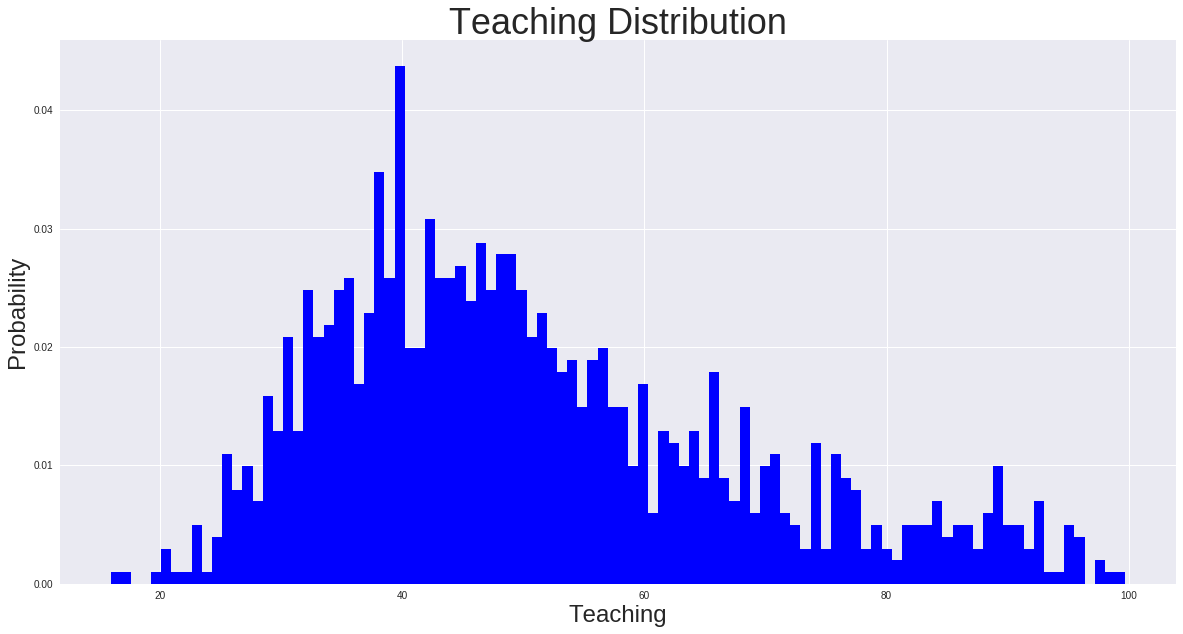

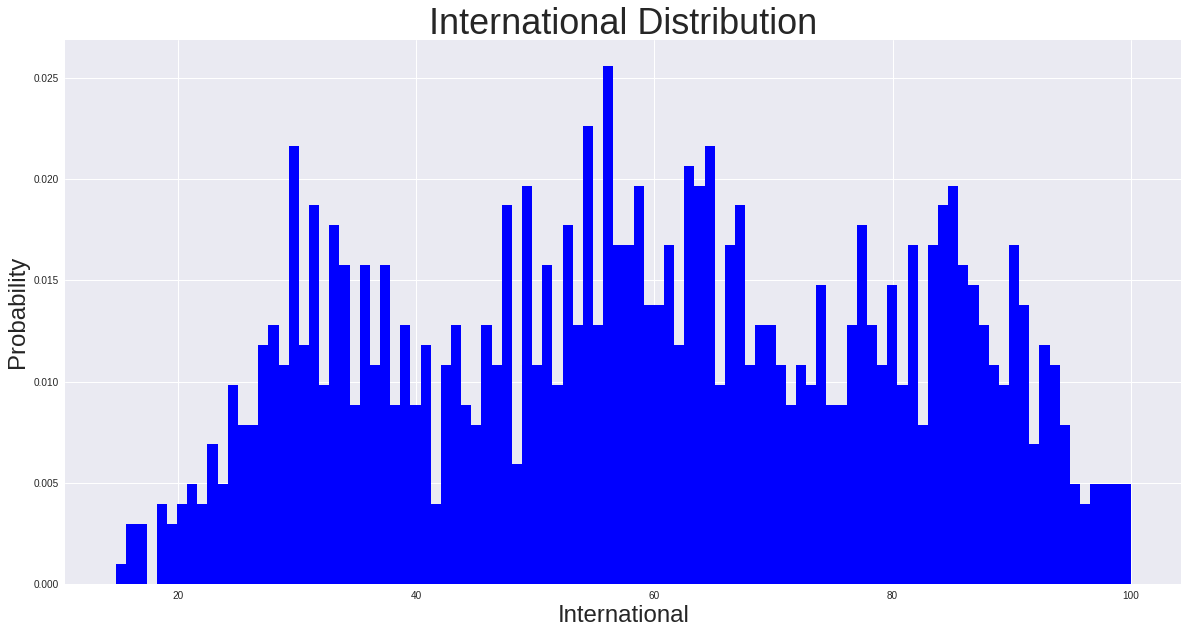

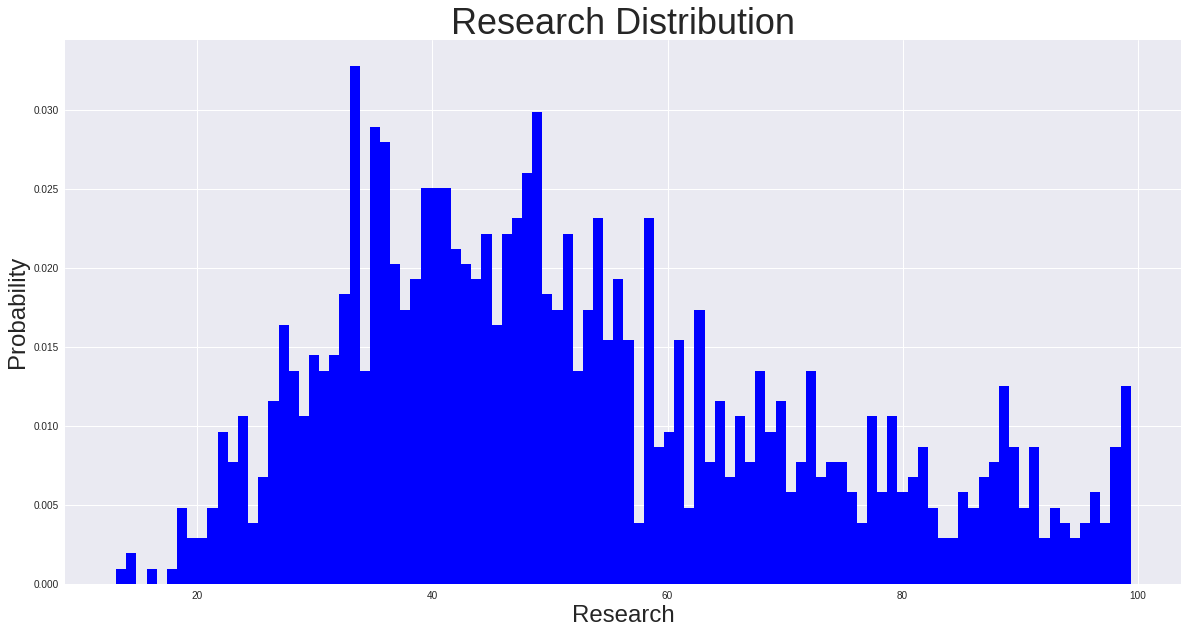

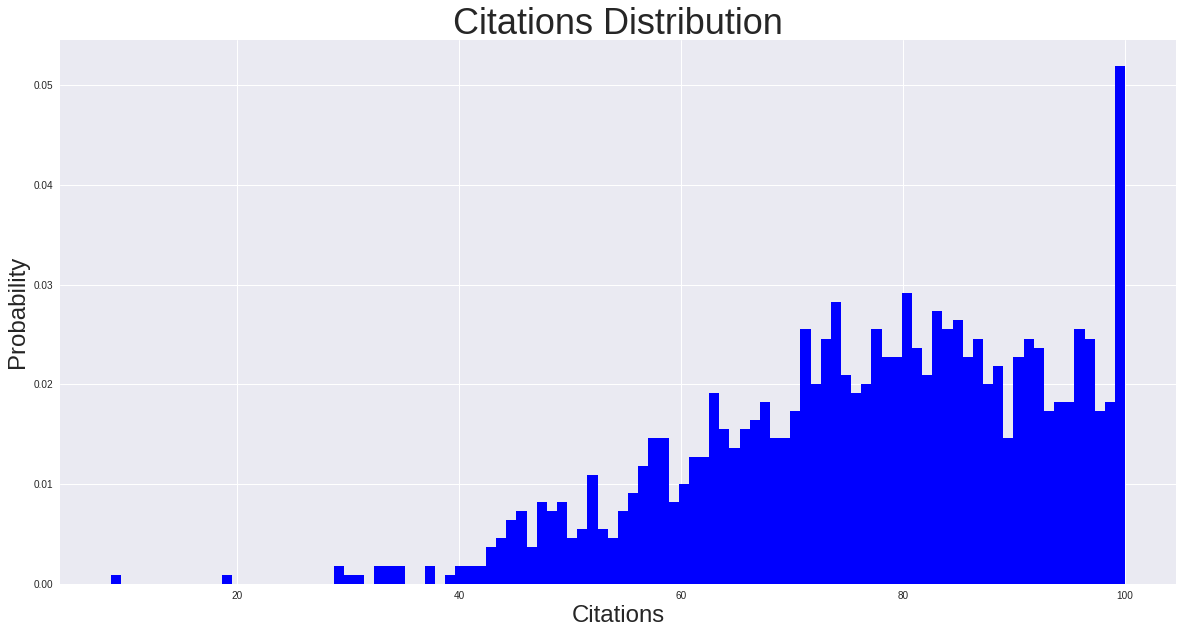

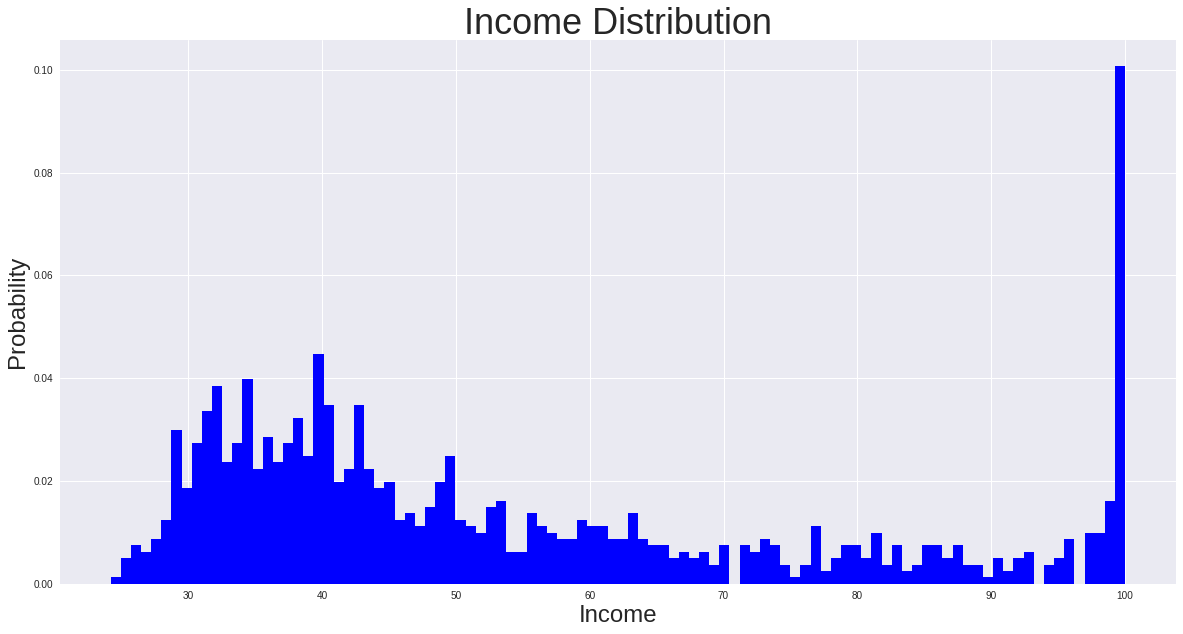

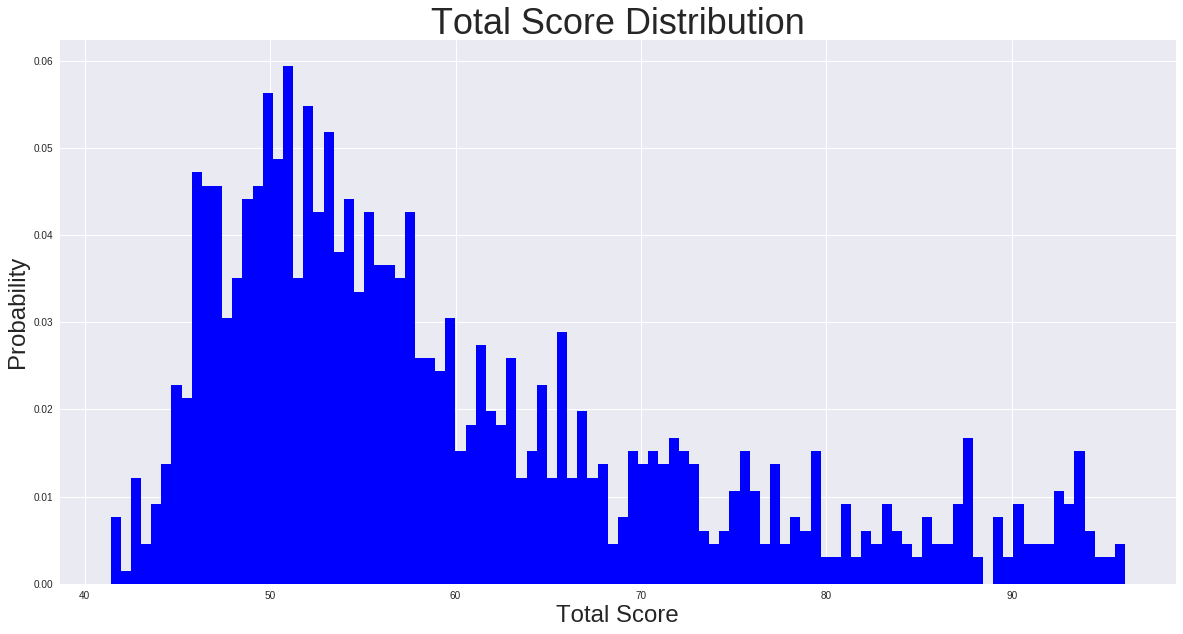

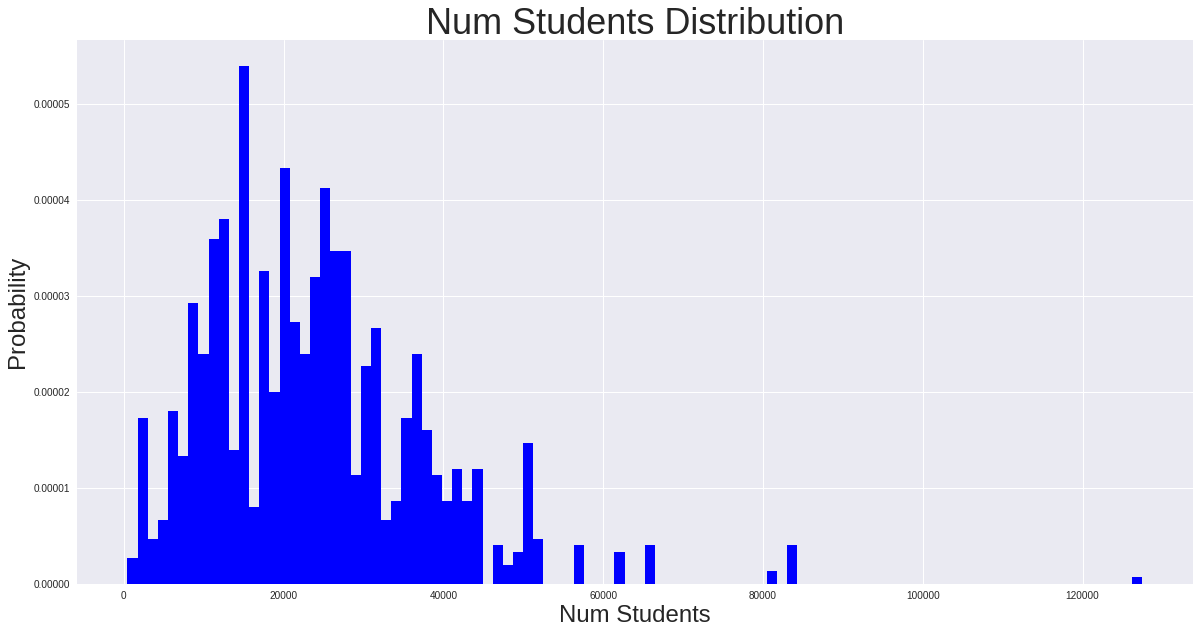

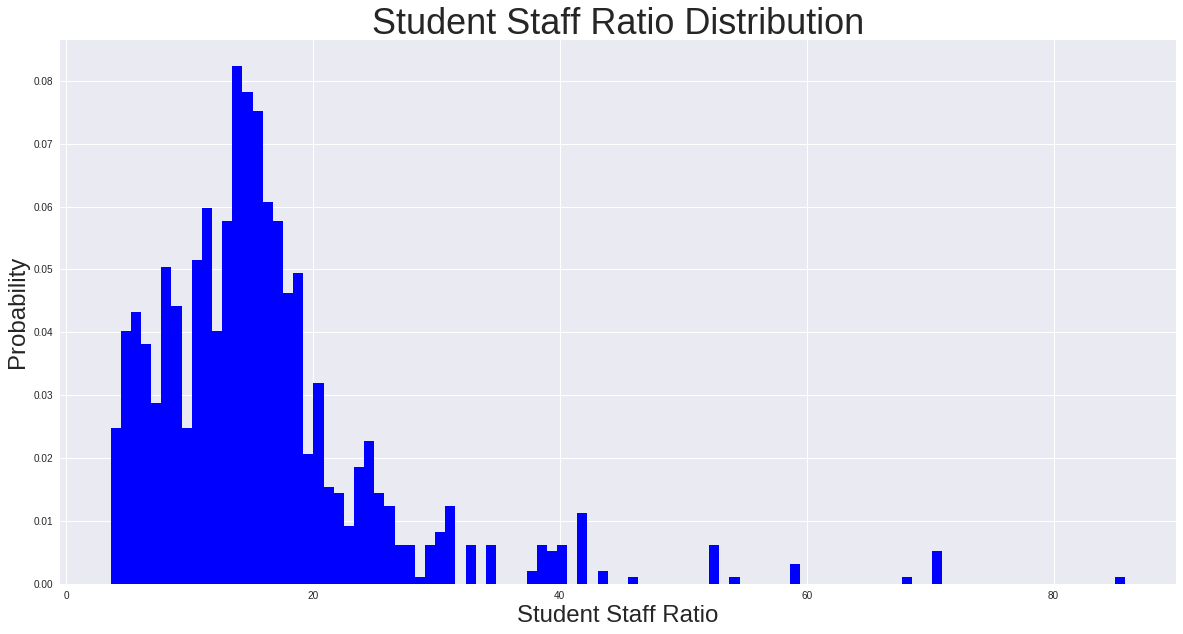

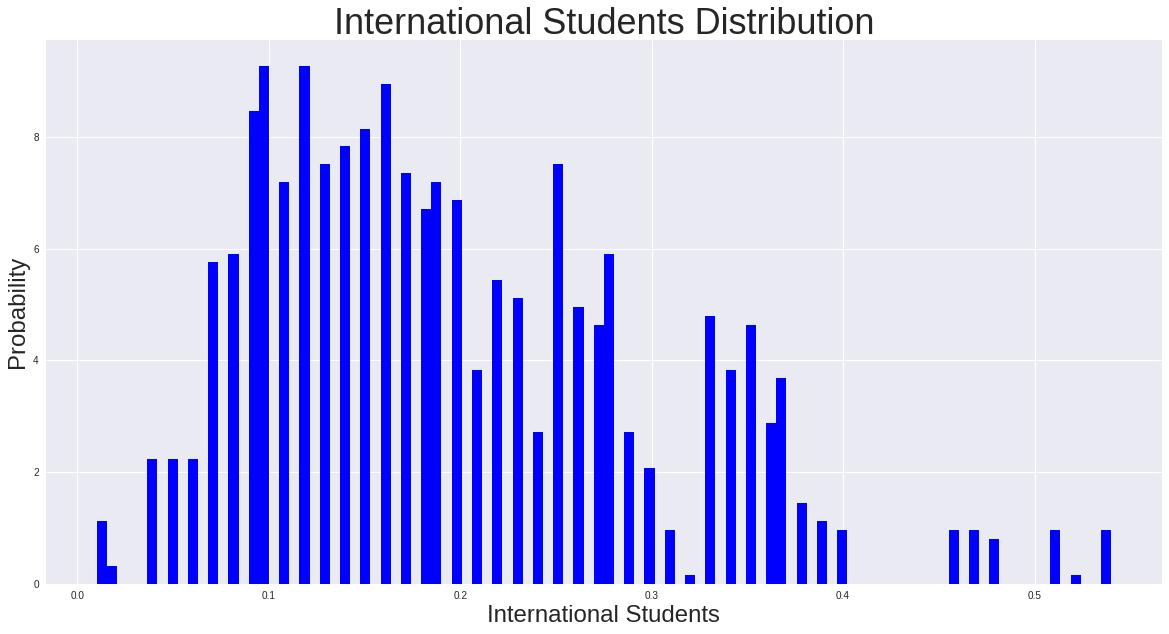

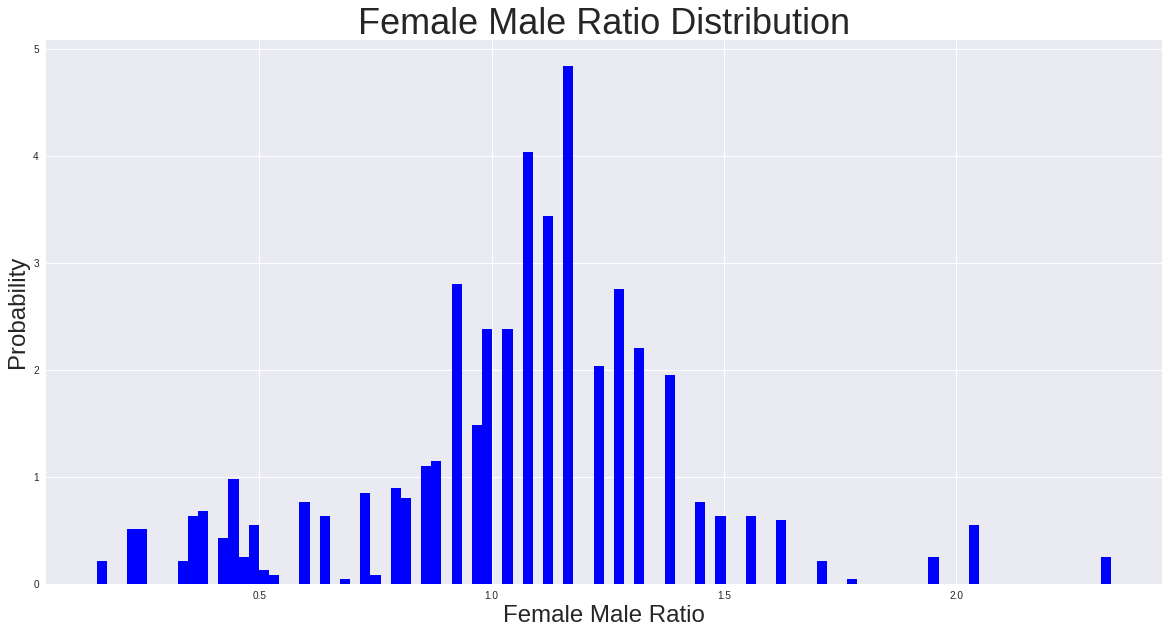

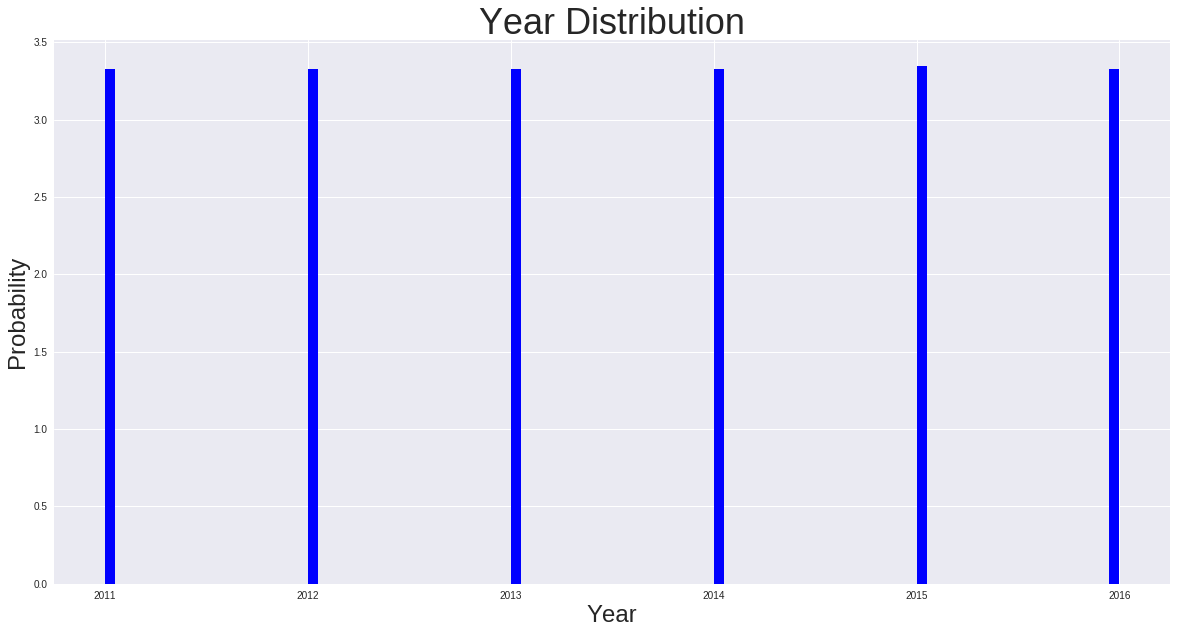

In [154]:
for i in range(len(wur_data.columns)):
    column = wur_data.columns[i]
    if type(wur_data[column][0]) != str:
        hist(wur_data, column)

## Seaborn plot

In [165]:
def distplot(df, column):
    sns.distplot(df[column].dropna(), hist = True, kde = True, rug = True, vertical = False, color = 'blue')
    sns.plt.show()

A normed histogram like plt.hist();

A gaussian kernel density estimate;

A rugplot on the support axis (plot datapoints in an array as sticks on an axis).

### KDE
In statistics, kernel density estimation is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

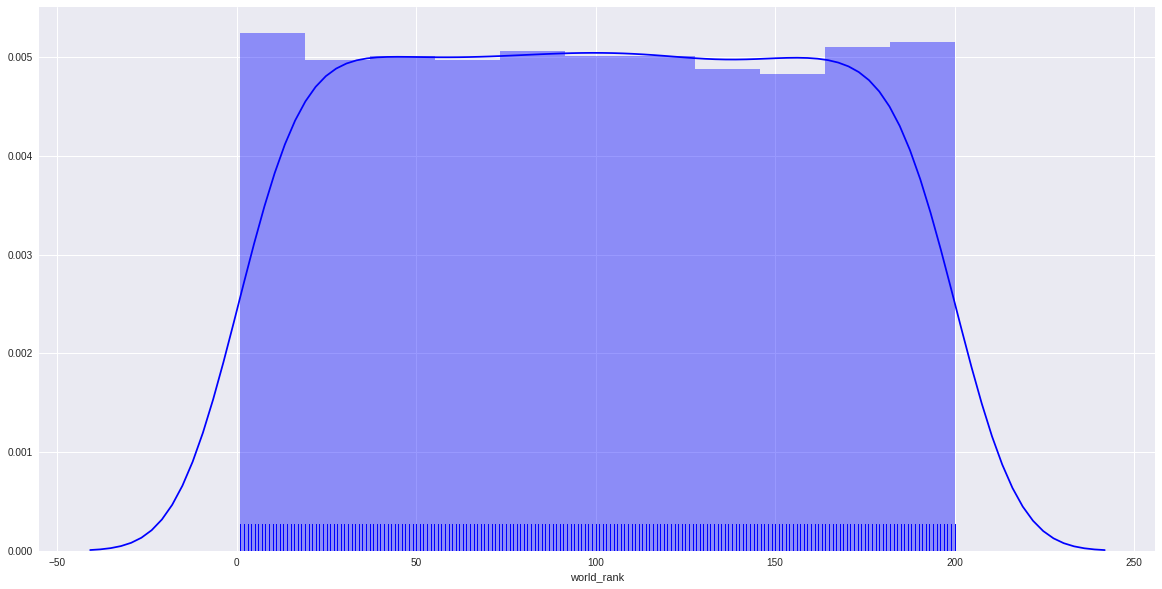

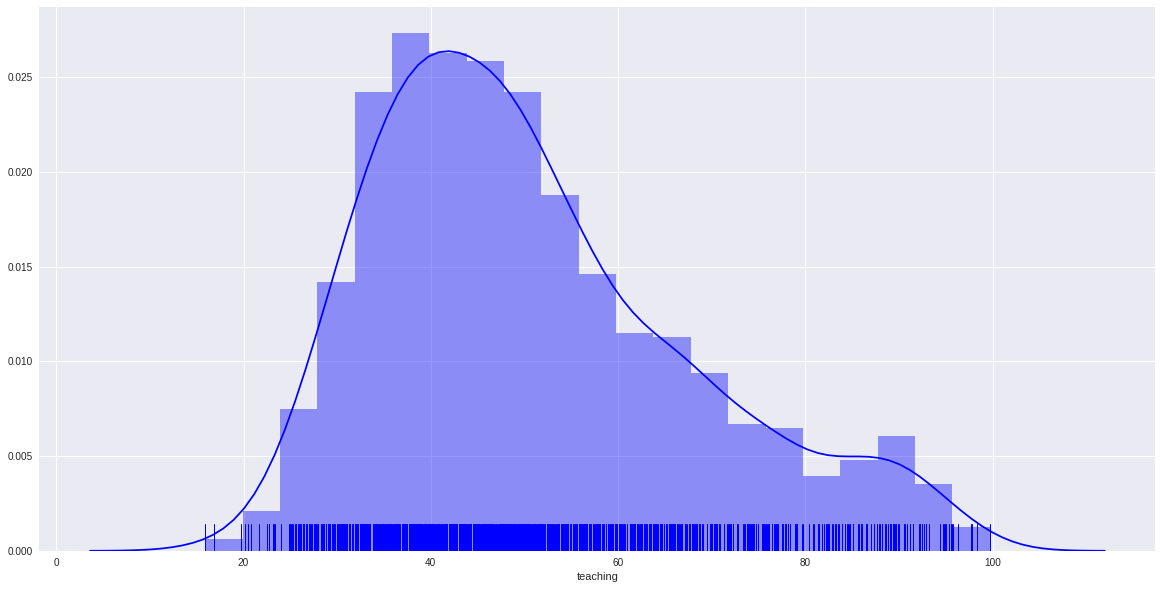

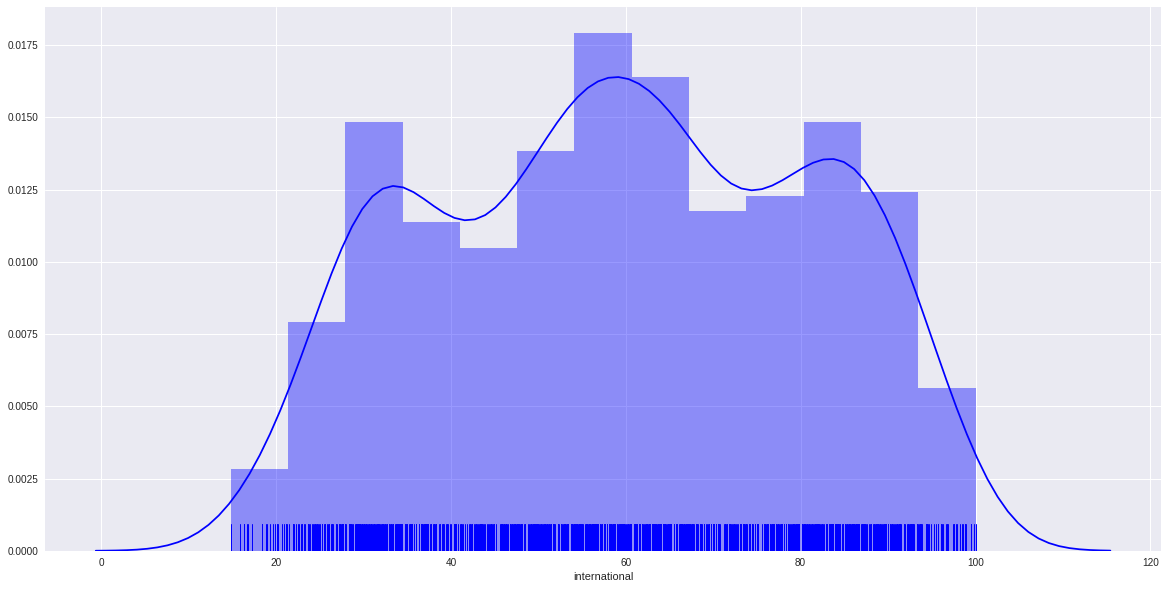

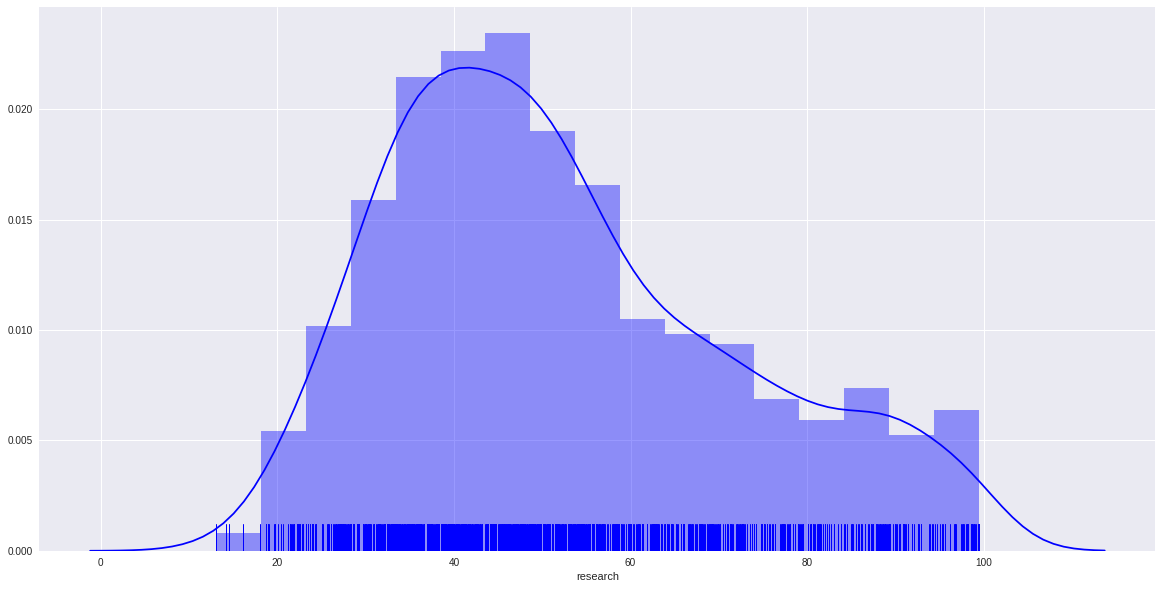

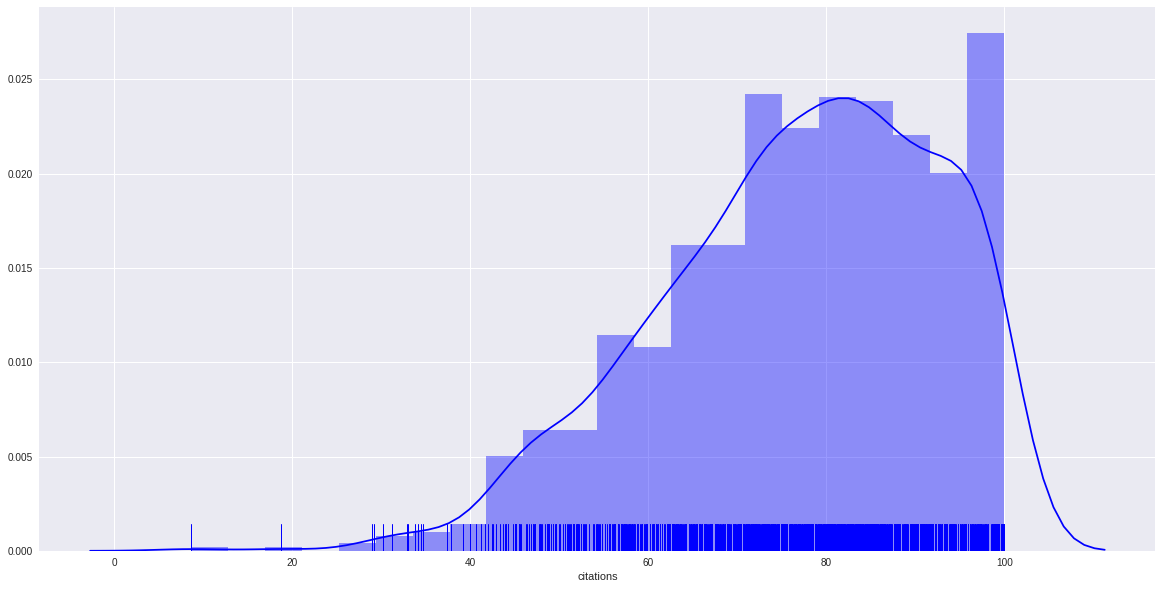

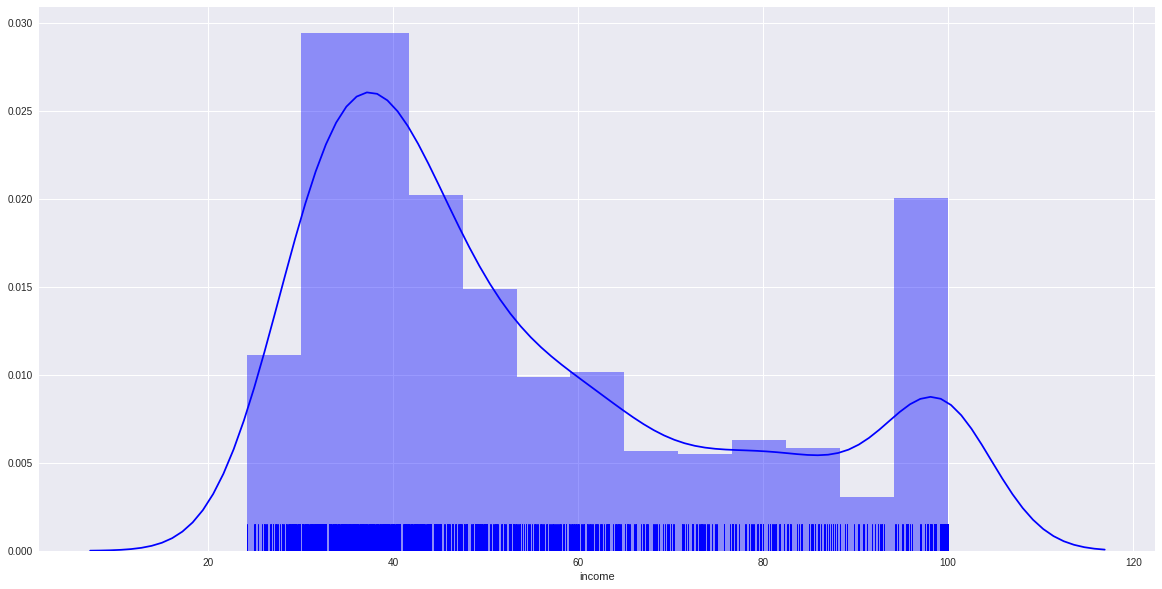

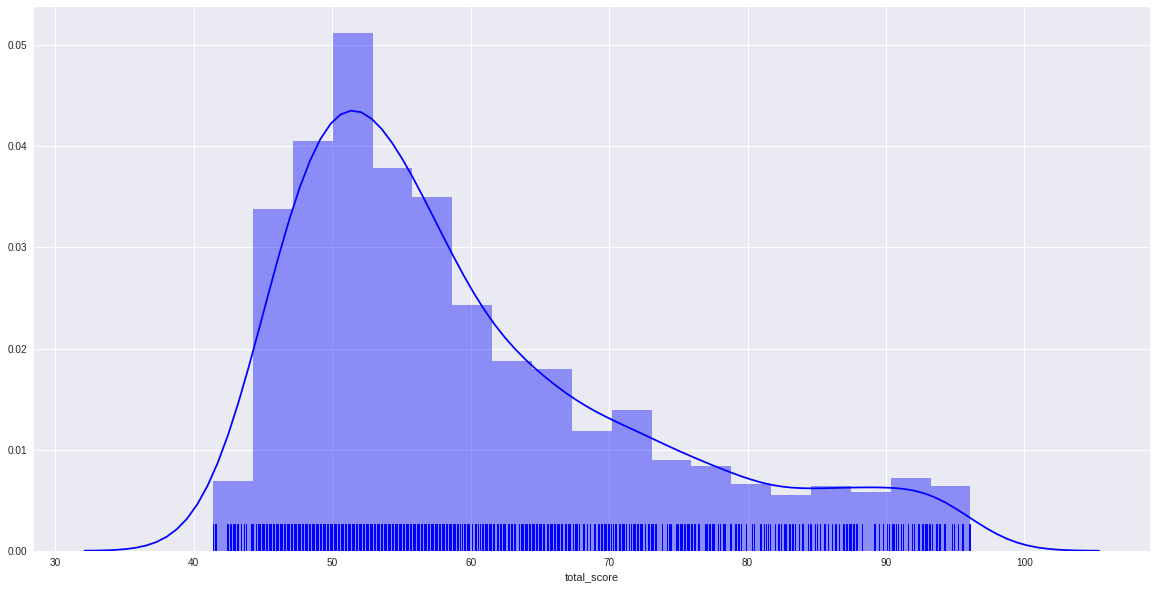

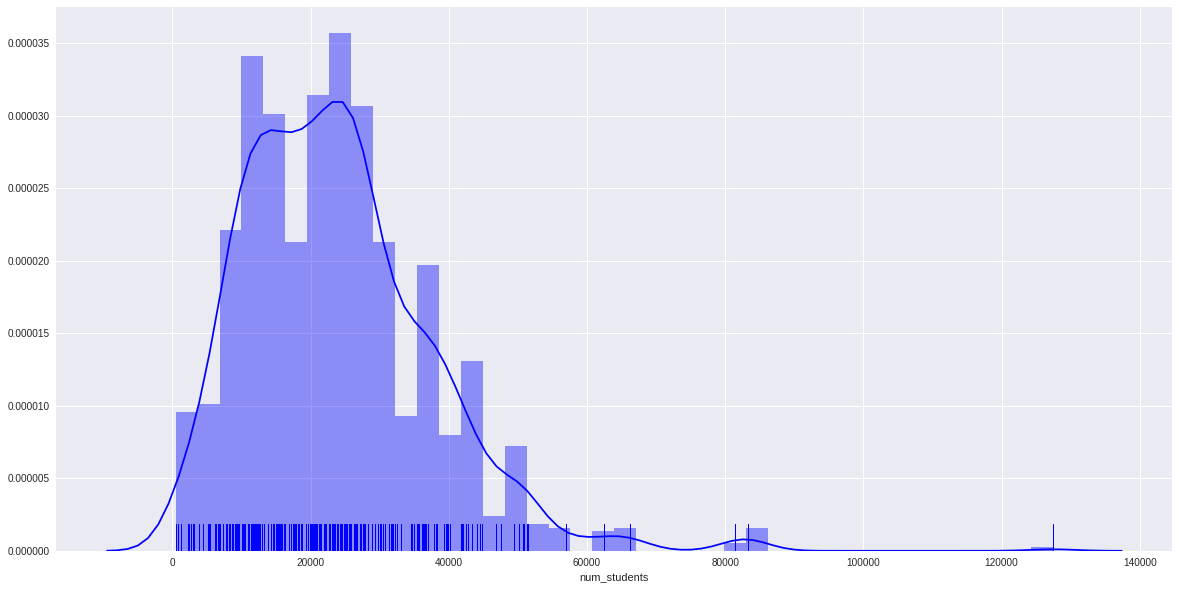

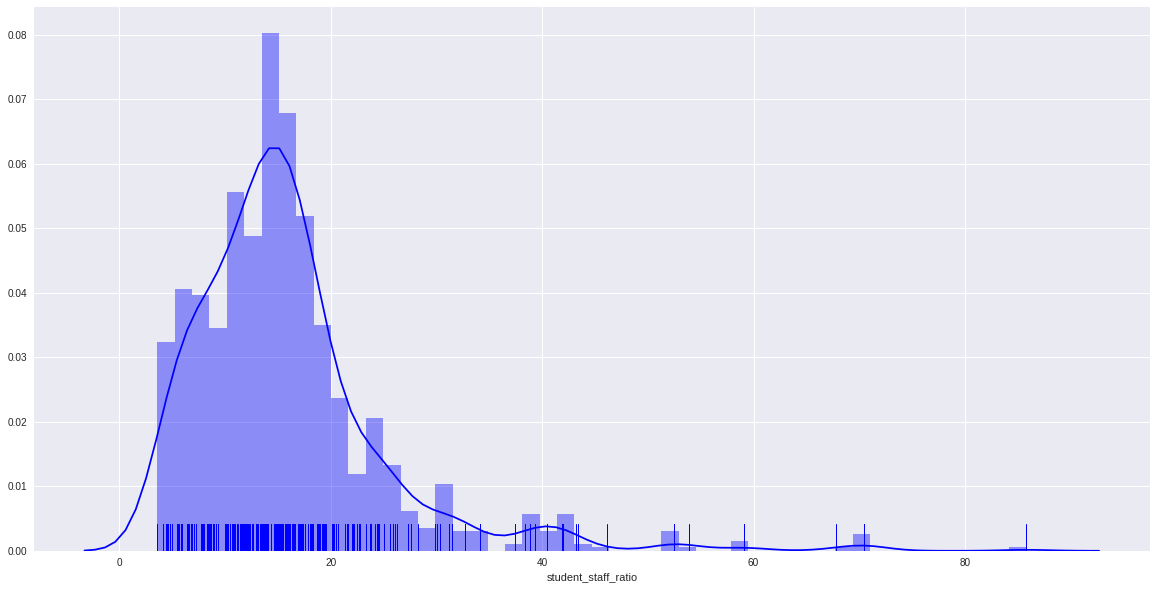

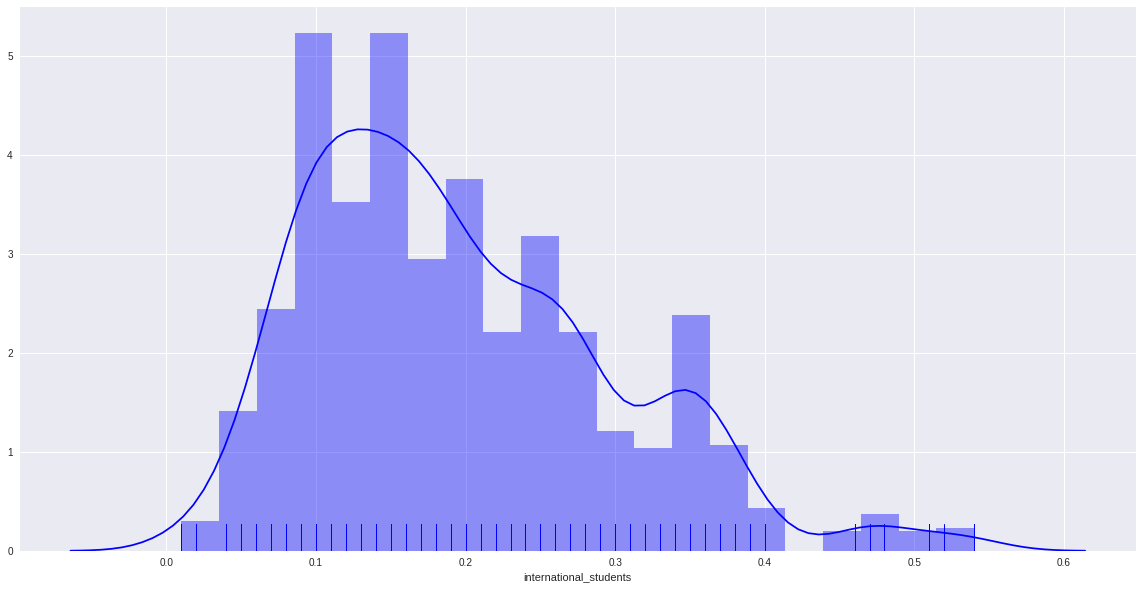

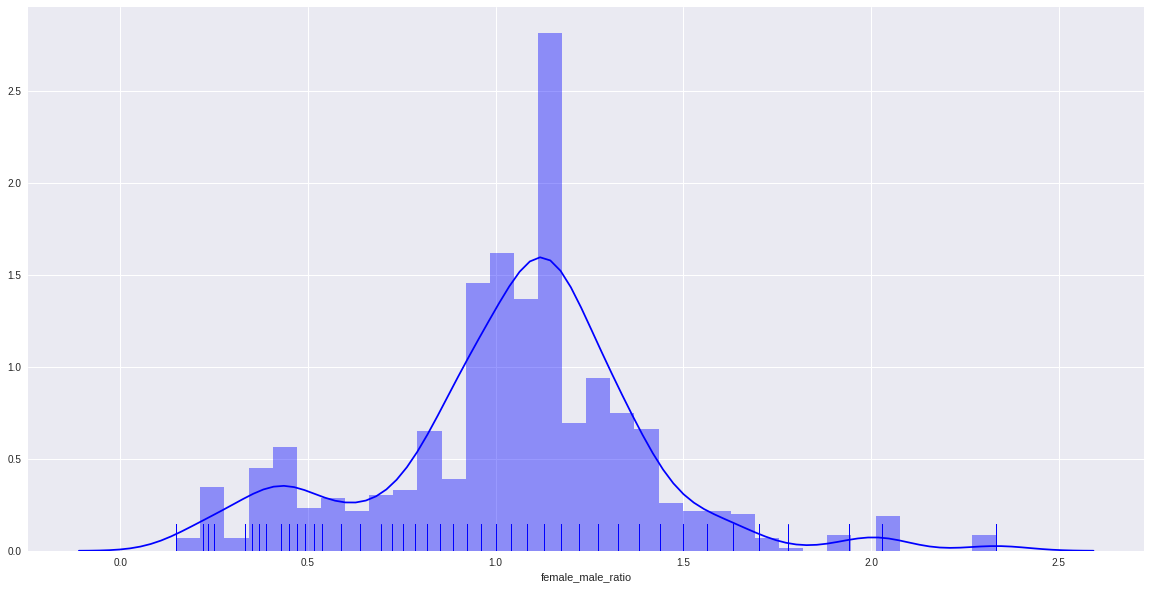

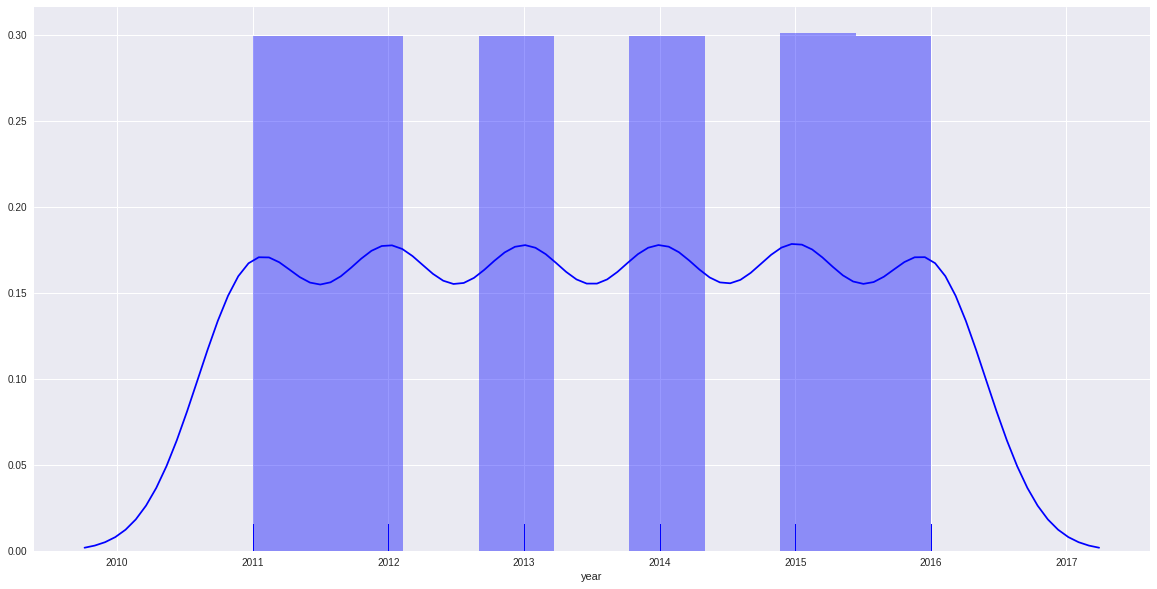

In [166]:
for i in range(len(wur_data.columns)):
    column = wur_data.columns[i]
    if type(wur_data[column][0]) != str:
        distplot(wur_data, column)

Distplot from 2011 to 2016

In [163]:
def facegrid(df, column):
    g = sns.FacetGrid(df, col='year')
    g.map(sns.distplot, column)
    sns.plt.show()

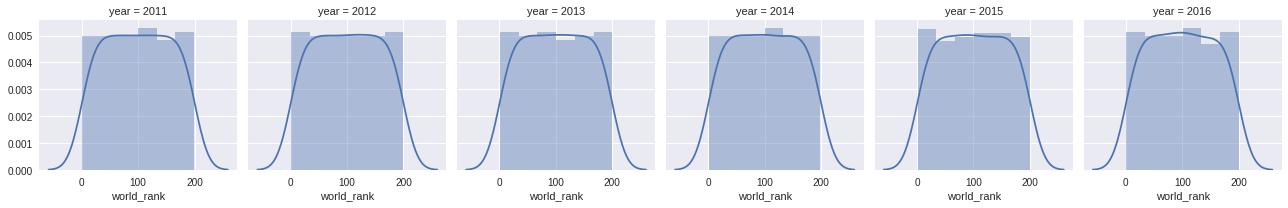

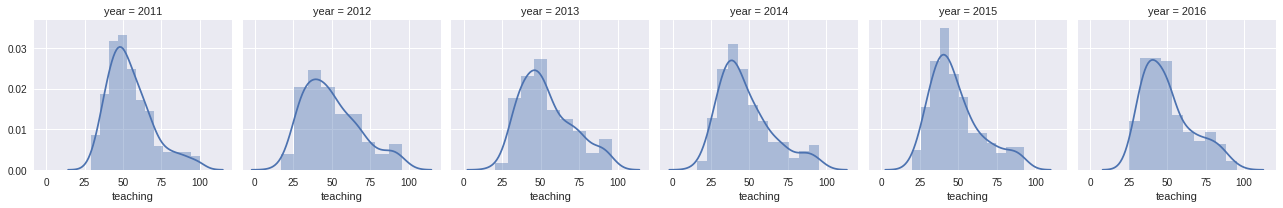

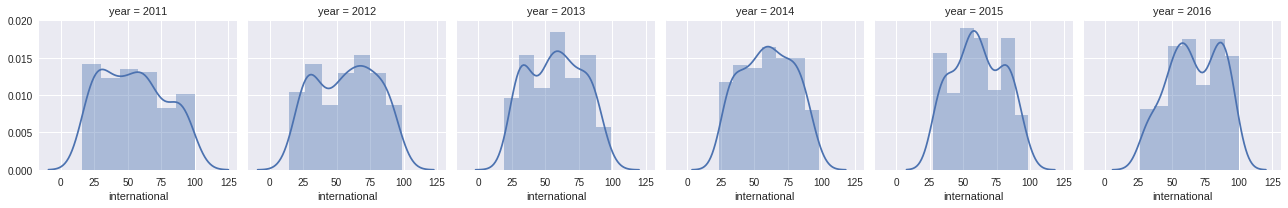

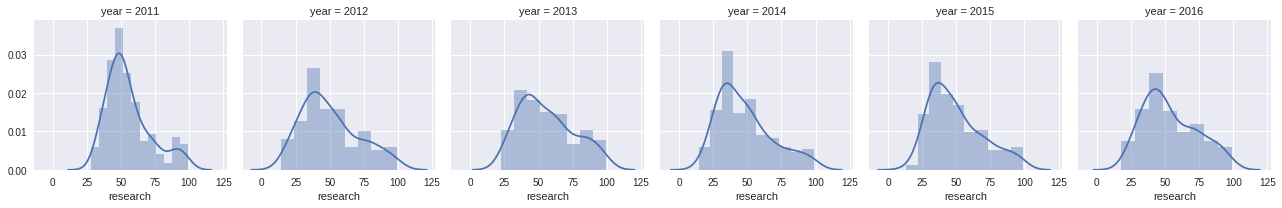

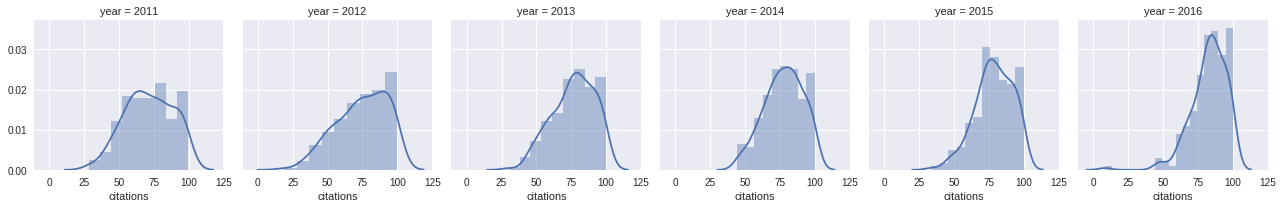

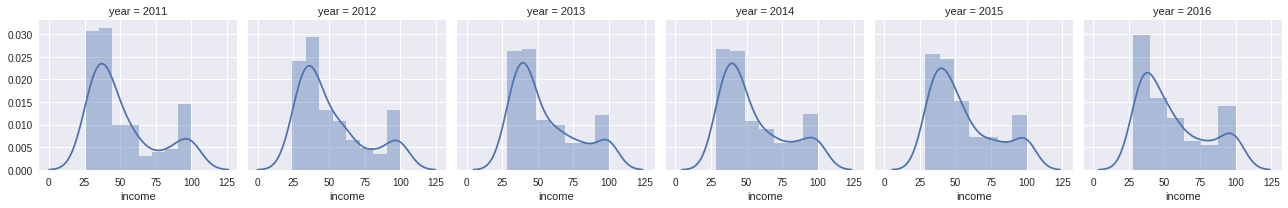

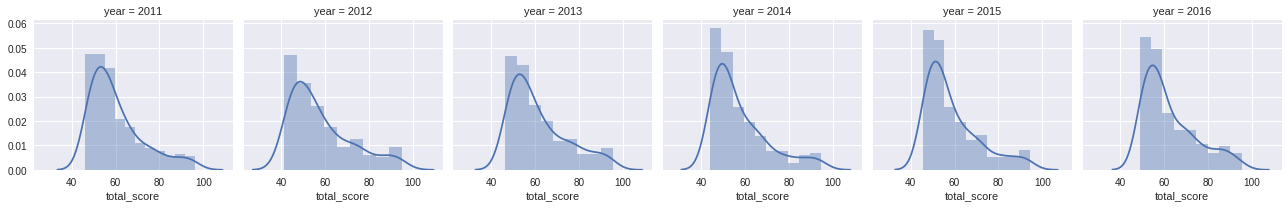

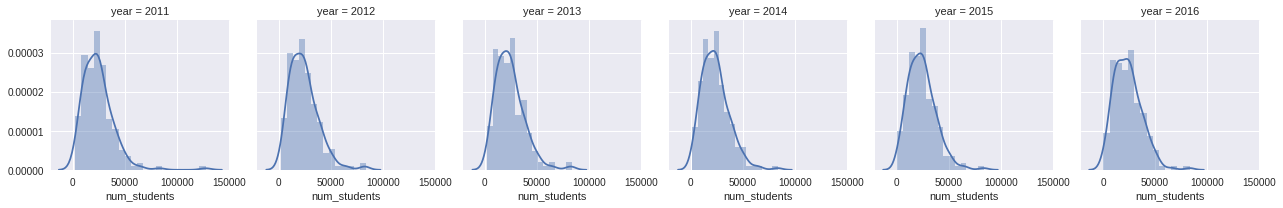

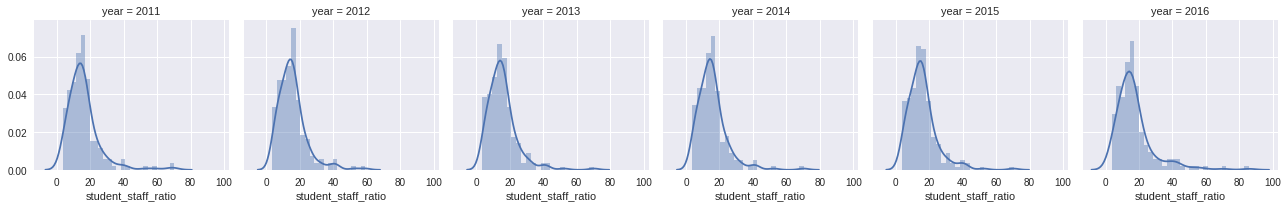

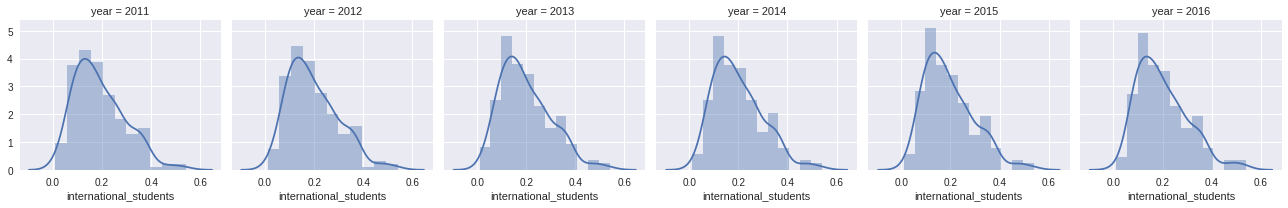

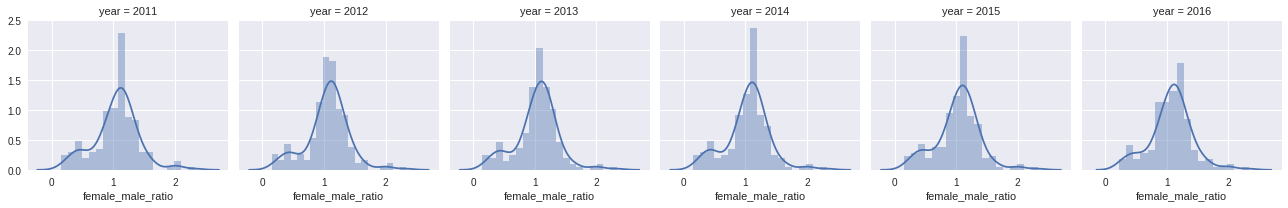

In [167]:
for i in range(len(wur_data.columns)):
    column = wur_data.columns[i]
    if type(wur_data[column][0]) != str and column != 'year' :
        facegrid(wur_data, column)

# Relationship

Pearson correlation coefficient is a measure of the linear correlation between two variables X and Y. 
It has a value between +1 and −1, where 
1 is total positive linear correlation, 0 is no linear correlation, and 
−1 is total negative linear correlation.

DataFrame.corr(method='pearson', min_periods=1)

In [160]:
data_corr = wur_data.corr()

The heatmap is a correlation matrix.

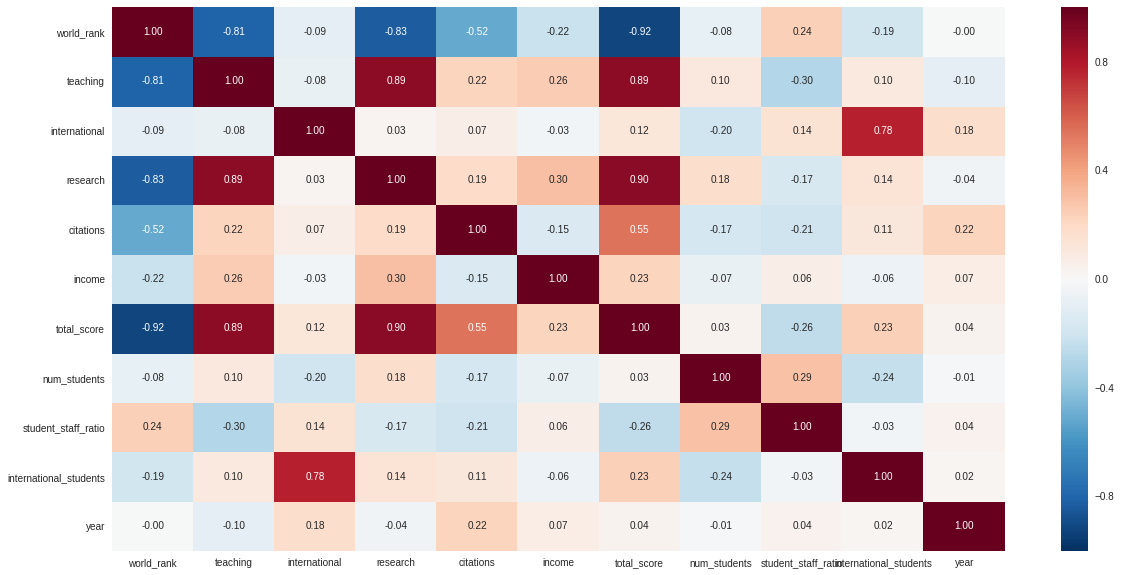

In [161]:
sns.heatmap(data_corr, annot=True, fmt=".2f")

Apart from parameters having PPC = 1 with themselves;

Some relationships with high Pearson correlation coefficient (more than 0.75):

total_score -- research; 0.90

teaching -- total_score; 0.89

research -- teaching; 0.89

international -- international_students; 0.78

In [175]:
data_corr_high = data_corr[data_corr > 0.75][data_corr < 1]

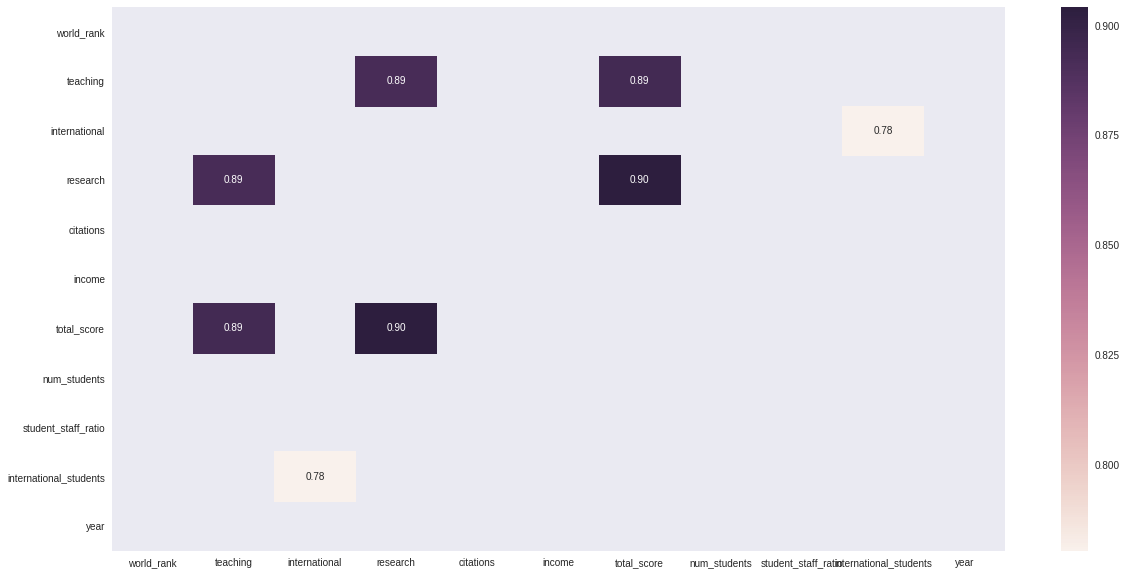

In [177]:
sns.heatmap(data_corr_high, annot=True, fmt=".2f")

## Correlation between two parameters

Seaborn.jointplot():

Draw a plot of two variables with bivariate and univariate graphs;

Kind = 'reg'.

### Regression Analysis

In statistical modeling, regression analysis is a statistical process for estimating the relationships among variables. It includes many techniques for modeling and analyzing several variables, when the focus is on the relationship between a dependent variable and one or more independent variables (or 'predictors').

Pearson Correlation Coefficient (PCC);

P-value: the probabolity pf an uncorrelated system producing datastes that have a Pearson correlation.

### research -- total_score    0.90

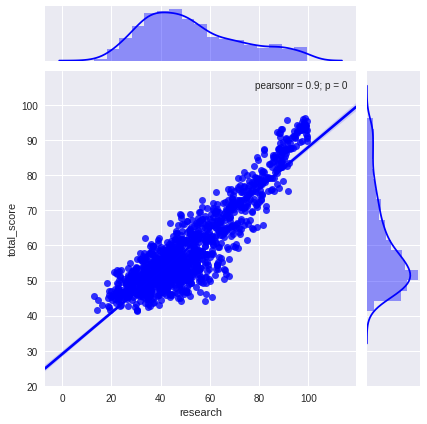

In [179]:
sns.jointplot(data=wur_data, x='research', y='total_score', kind='reg', color='b')
sns.plt.show()

### teaching -- total_score    0.89

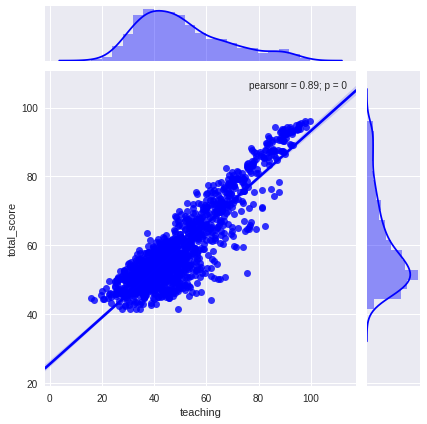

In [180]:
sns.jointplot(data=wur_data, x='teaching', y='total_score', kind='reg', color='b')
sns.plt.show()

### teahcing -- research    0.89

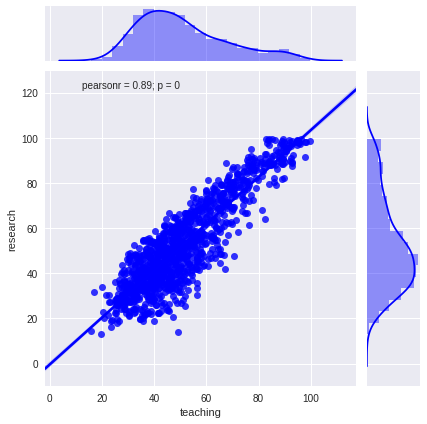

In [181]:
sns.jointplot(data=wur_data, x='teaching', y='research', kind='reg', color='b')
sns.plt.show()

### international_students -- international    0.78

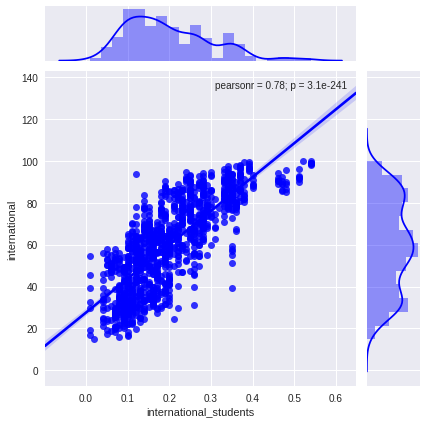

In [182]:
sns.jointplot(data=wur_data, x='international_students', y='international', kind='reg', color='b')
sns.plt.show()

# ? ANY COOL FINDINGS